In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport



In [4]:


# Load the dataset into a pandas DataFrame

data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic copy.csv")

# Mapping for target variable levels
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Obesity_Type_I': 2,
    'Obesity_Type_II': 3,
    'Obesity_Type_III': 4,
    'Overweight_Level_I': 5,
    'Overweight_Level_II': 6
}

# Replace target variable values with integers
data['NObeyesdad'] = data['NObeyesdad'].map(target_mapping)

# Mapping for 'CALC' variable levels
calc_mapping = {
    'Always': 3,
    'Frequently': 2,
    'Sometimes': 1,
    'no': 0
}

# Replace 'CALC' variable values with integers
data['CALC'] = data['CALC'].map(calc_mapping)


# Mapping for 'MTRANS' variable levels
mtrans_mapping = {
    'Automobile': 0,
    'Bike': 1,
    'Motorbike': 2,
    'Public_Transportation': 3,
    'Walking': 4
}

# Replace 'MTRANS' variable values with integers
data['MTRANS'] = data['MTRANS'].map(mtrans_mapping)

# Mapping for 'CAEC' variable levels
caec_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Replace 'CAEC' variable values with integers
data['CAEC'] = data['CAEC'].map(caec_mapping)

# Mapping for 'SMOKE' variable levels
smoke_mapping = {
    'no': 0,
    'yes': 1
}

# Replace 'SMOKE' variable values with integers
data['SMOKE'] = data['SMOKE'].map(smoke_mapping)

# Mapping for 'FAVC' variable levels
favc_mapping = {
    'no': 0,
    'yes': 1
}

# Replace 'FAVC' variable values with integers
data['FAVC'] = data['FAVC'].map(favc_mapping)

scc_mapping = {
    'no': 0,
    'yes': 1
}

# Replace 'FAVC' variable values with integers
data['SCC'] = data['SCC'].map(favc_mapping)

# Mapping for 'family_history_with_overweight' variable levels
family_history_mapping = {
    'no': 0,
    'yes': 1
}

# Replace 'family_history_with_overweight' variable values with integers
data['family_history_with_overweight'] = data['family_history_with_overweight'].map(family_history_mapping)

# Mapping for 'Gender' variable levels
gender_mapping = {
    'Female': 0,
    'Male': 1
}

# Replace 'Gender' variable values with integers
data['Gender'] = data['Gender'].map(gender_mapping)

# You can examine the model parameters or feature importance depending on the type of Naive Bayes used


In [5]:
data

Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0        0   2.0  3.0     1      0  2.000000    0  0.000000  1.000000     0   
1        0   3.0  3.0     1      1  3.000000    1  3.000000  0.000000     1   
2        0   2.0  3.0     1      0  2.000000    0  2.000000  1.000000     2   
3        0   3.0  3.0     1      0  2.000000    0  2.000000  0.000000     2   
4        0   2.0  1.0     1      0  2.000000    0  0.000000  0.000000     1   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2106     1   3.0  3.0     1      0  1.728139    0  1.676269  0.906247     1   
2107     1   3.0  3.0     1      0  2.005130    0  1.341390  0.599270     1   
2108     1   3.0  3.0     1      0  2.054193    0  1.414209  0.646288     1   
2109     1   3.0  3.0     1      0  2.852339    0  1.139107  0.586035     1   
2110     1   3.0  3.0     1      0  2.863513    0  1.026452  0.714137     1   

      MTRANS  NObeyesdad  
0          3           1  
1          3           1  
2          3           1  
3          4           5  
4          3           6  
...      ...         ...  
2106       3           4  
2107       3           4  
2108       3           4  
2109       3           4  
2110       3           4  

[2111 rows x 17 columns]

In [54]:
# Generate the data profiling report
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Naive Bayes

In [6]:

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['NObeyesdad'])  # Features
y = data['NObeyesdad']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using the classifier's learned model

Accuracy: 0.640661938534279

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        56
           1       0.68      0.34      0.45        62
           2       0.44      0.64      0.52        78
           3       0.66      0.91      0.77        58
           4       1.00      1.00      1.00        63
           5       0.49      0.30      0.37        56
           6       0.57      0.32      0.41        50

    accuracy                           0.64       423
   macro avg       0.65      0.63      0.62       423
weighted avg       0.64      0.64      0.62       423



# Decision Tree


In [7]:






# Split the data into features (X) and target variable (y)
X = data.drop(columns=['NObeyesdad'])  # Features
y = data['NObeyesdad']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)



# Predict the class labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using the classifier's learned model
# You can examine feature importance using clf.feature_importances_


Accuracy: 0.9385342789598109

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        56
           1       0.89      0.89      0.89        62
           2       0.97      0.91      0.94        78
           3       0.93      0.95      0.94        58
           4       1.00      1.00      1.00        63
           5       0.91      0.91      0.91        56
           6       0.94      0.94      0.94        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



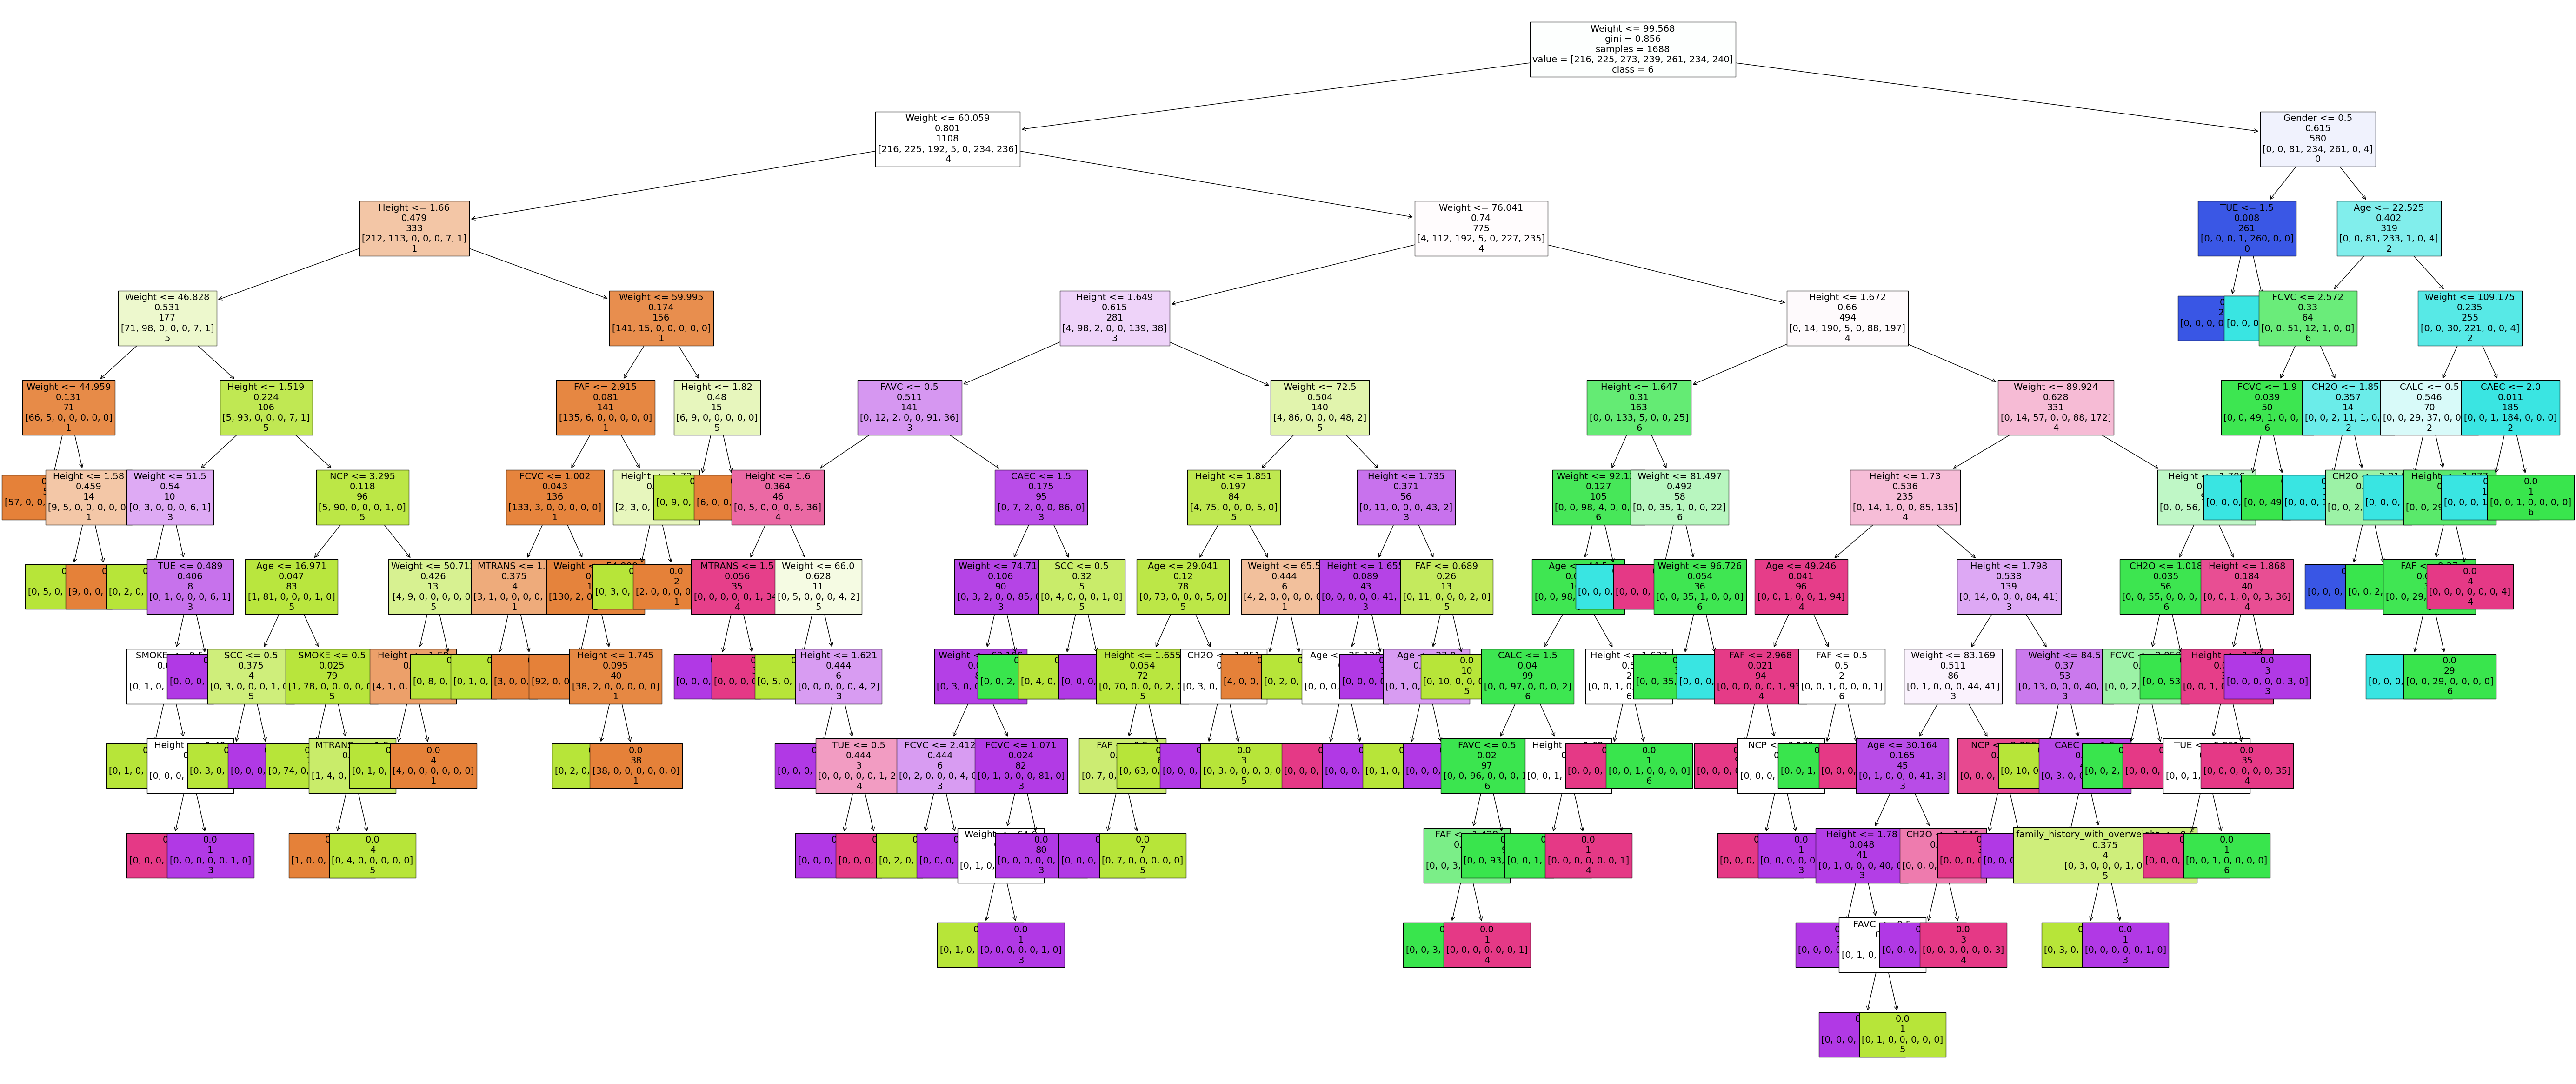

In [8]:
plt.figure(figsize=(70,30))
plot_tree(clf, filled=True, feature_names=[str(col) for col in X.columns], class_names=[str(cls) for cls in data['NObeyesdad'].unique()],fontsize=14, label='root')
plt.show()



# Logistic Regression

In [9]:

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
clf.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using logistic regression coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': clf.coef_[0]})
print("\nLogistic Regression Coefficients:")
print(coefficients)


Accuracy: 0.7801418439716312

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        56
           1       0.76      0.47      0.58        62
           2       0.85      0.74      0.79        78
           3       0.84      0.98      0.90        58
           4       0.97      1.00      0.98        63
           5       0.62      0.64      0.63        56
           6       0.53      0.64      0.58        50

    accuracy                           0.78       423
   macro avg       0.77      0.78      0.77       423
weighted avg       0.78      0.78      0.77       423


Logistic Regression Coefficients:
                          Variable  Coefficient
0                           Gender     2.476294
1                              Age     0.120678
2                           Height     6.126975
3                           Weight    -0.470159
4   family_history_with_overweight    -0.225282
5                          

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forests

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using the Random Forest feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importances:")
print(feature_importances)


Accuracy: 0.9550827423167849

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.88      0.94      0.91        62
           2       0.99      0.97      0.98        78
           3       0.95      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.88      0.89        56
           6       0.98      0.94      0.96        50

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423


Random Forest Feature Importances:
                           Feature  Importance
3                           Weight    0.342652
2                           Height    0.101427
1                              Age    0.094679
6                             FCVC    0.094655
0                           Gender    0.051918
7                              N

#  XGBoost

In [11]:


# Train an XGBoost classifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using the XGBoost feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nXGBoost Feature Importances:")
print(feature_importances)


Accuracy: 0.9621749408983451

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.89      0.92        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.95      0.93        56
           6       1.00      0.98      0.99        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423


XGBoost Feature Importances:
                           Feature  Importance
0                           Gender    0.278894
3                           Weight    0.166762
6                             FCVC    0.108859
14                            CALC    0.087889
5                             FAVC    0.065805
8                             CAEC    

# SVM

In [12]:

# Train an SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Note: SVMs do not provide direct feature importances like decision trees or logistic regression.
# You can analyze the effect of different variables by examining the model's coefficients or support vectors, 
# but interpreting these for multi-class classification (as in this case) can be more complex.


Accuracy: 0.5626477541371159

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        56
           1       0.48      0.34      0.40        62
           2       0.65      0.33      0.44        78
           3       0.77      0.40      0.52        58
           4       0.55      1.00      0.71        63
           5       0.47      0.48      0.47        56
           6       0.43      0.58      0.49        50

    accuracy                           0.56       423
   macro avg       0.58      0.57      0.55       423
weighted avg       0.58      0.56      0.54       423



# Comparison

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }

# Display results
results_df = pd.DataFrame(results).transpose()
print("\nModel Comparison:")
print(results_df)


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Comparison:
                     Accuracy  Precision    Recall  F1-score
Naive Bayes          0.640662   0.644995  0.640662  0.619630
Decision Tree        0.938534   0.939093  0.938534  0.938596
Logistic Regression  0.780142   0.783963  0.780142  0.773937
Random Forest        0.955083   0.955968  0.955083  0.955350
XGBoost              0.962175   0.962662  0.962175  0.962060
SVM                  0.562648   0.583295  0.562648  0.541634


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.780142   0.783963  0.780142  0.773937
Random Forest        0.957447   0.958410  0.957447  0.957776
XGBoost              0.962175   0.962662  0.962175  0.962060
SVM                  0.562648   0.583295  0.562648  0.541634
Decision Tree        0.936170   0.936594  0.936170  0.936258
Naive Bayes          0.640662   0.644995  0.640662  0.619630


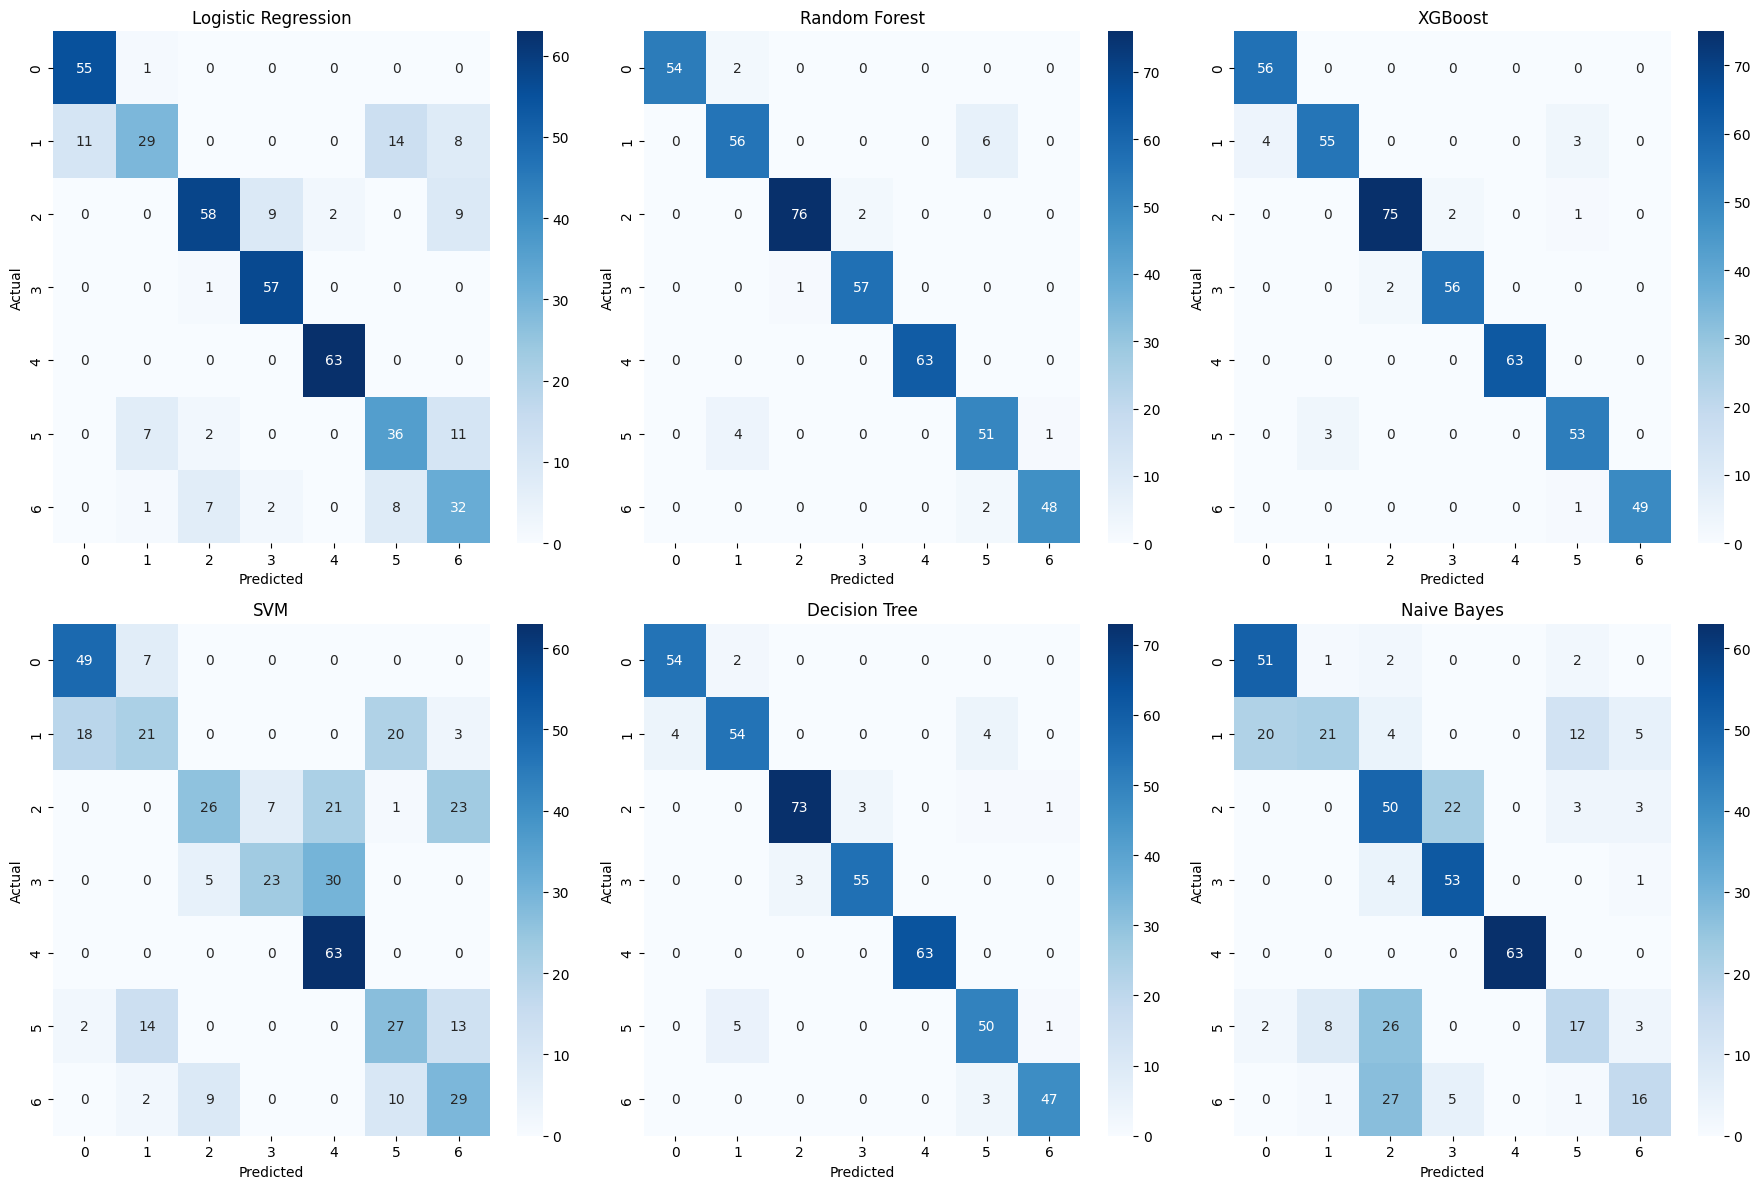

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Initialize a figure to contain subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Iterate over models and plot confusion matrix for each
for idx, (name, model) in enumerate(models.items()):
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(name)
    axes[idx//3, idx%3].set_xlabel('Predicted')
    axes[idx//3, idx%3].set_ylabel('Actual')

plt.tight_layout()
plt.show()


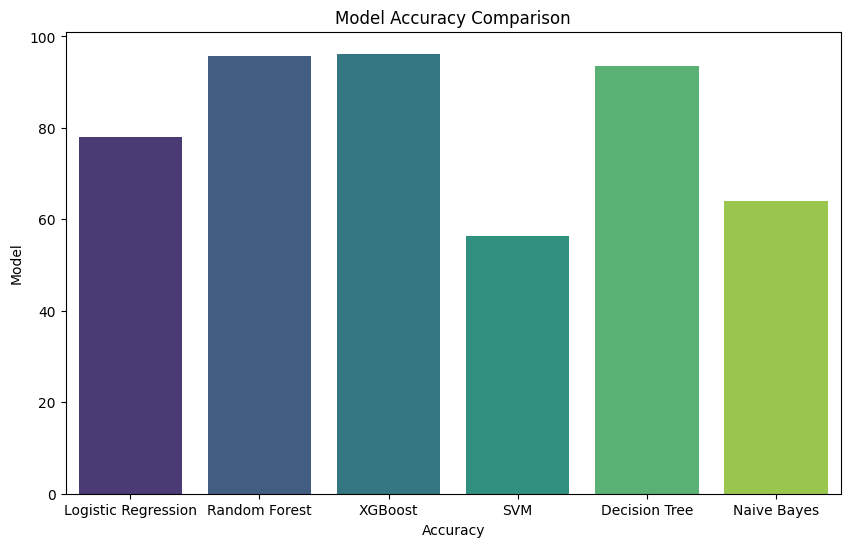

In [20]:
# Extract accuracies from results
accuracies = results_df['Accuracy']

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=(accuracies.values)*100, x=accuracies.index, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


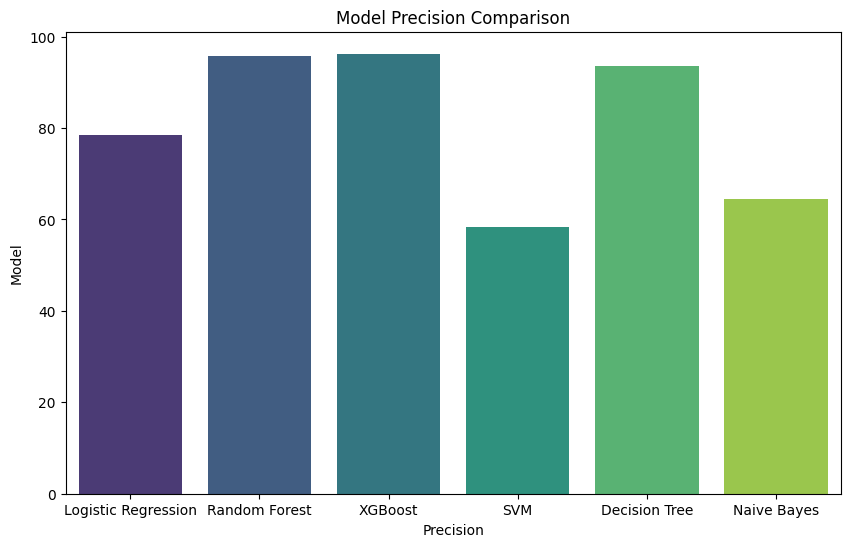

In [25]:
# Extract precision scores and model names
precisions = results_df['Precision']

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=(precisions.values)*100, x=precisions.index, palette="viridis")
plt.title("Model Precision Comparison")
plt.xlabel("Precision")
plt.ylabel("Model")
plt.show()

